# Apply Lth Bloq

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ApplyLthBloq`
A SELECT operation that executes one of a list of bloqs $U_l$ based on a quantum index:

$$
\mathrm{SELECT} = \sum_{l}|l \rangle \langle l| \otimes U_l
$$

This bloq uses the unary iteration scheme to apply `ops[selection]` controlled on an optional
single-bit `control` register.

#### Parameters
 - `ops`: NDArray of bloqs. Each bloq must have identical registers that are all THRU.
 - `selection_regs`: List of selection registers, defaults to N-D selection index based on `ops`.
 - `control_val`: If provided, a singly controlled gate is constructed. 

#### Registers
 - `selection`: The indices of the bloq in `ops` to execute.
 - `control`: The control bit if specified above.
 - `[user_spec]`: The output registers of the bloqs in `ops`. 

#### References
 - [Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity]( https://arxiv.org/abs/1805.03662). Babbush et. al. (2018). Section III.A. and Figure 7.


In [2]:
from qualtran.bloqs.multiplexers.apply_lth_bloq import ApplyLthBloq

### Example Instances

In [3]:
from qualtran.bloqs.basic_gates import Hadamard, TGate, XGate, ZGate

ops = np.array((TGate(), Hadamard(), ZGate(), XGate()))
apply_lth_bloq = ApplyLthBloq(ops, control_val=1)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([apply_lth_bloq],
           ['`apply_lth_bloq`'])

### Call Graph

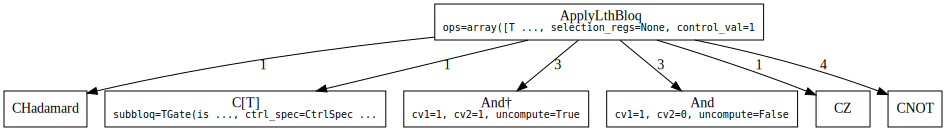

#### Counts totals:
 - `And`: 3
 - `And†`: 3
 - `CHadamard`: 1
 - `CNOT`: 4
 - `CZ`: 1
 - `C[T]`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
apply_lth_bloq_g, apply_lth_bloq_sigma = apply_lth_bloq.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(apply_lth_bloq_g)
show_counts_sigma(apply_lth_bloq_sigma)